# ala Python Zusammenfassung

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

## LE1 Eigenvektoren, Eigenwerte, Eigenraeume

In [2]:
M = np.array([[2,5],[8,10]])
M

array([[ 2,  5],
       [ 8, 10]])

### Eigenwerte und Eigenvektoren bestimmen

In [3]:
# Eigenwerte und Eigenvektoren bestimmen
eigenwerteM, eigenvektorenM = np.linalg.eig(M)
display(eigenwerteM, eigenvektorenM)

array([-1.48331477, 13.48331477])

array([[-0.82051622, -0.39921318],
       [ 0.57162325, -0.91685813]])

In [4]:
# beide Eigenvektoren
v1 = eigenvektorenM[ : , 0]
v2 = eigenvektorenM[ : , 1]
display(v1, v2)

array([-0.82051622,  0.57162325])

array([-0.39921318, -0.91685813])

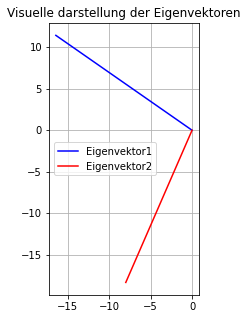

In [5]:
# Eigenvektoren visuell darstellen
plt.figure(figsize=(10,5))
plt.plot( [0, v1[0] * 20], [0, v1[1] * 20], color = "b", label = "Eigenvektor1")
plt.plot( [0, v2[0] * 20], [0, v2[1] * 20], color = "r", label = "Eigenvektor2")
plt.grid()
plt.gca().set_aspect("equal")
plt.legend()
plt.title("Visuelle darstellung der Eigenvektoren")
plt.show()

### Diagonalisierung einer nicht symmetrische Matrix 

In [6]:
M = np.array([[0.,0.,-2.],[1.,2.,1.],[1.,0.,3.]])
M

array([[ 0.,  0., -2.],
       [ 1.,  2.,  1.],
       [ 1.,  0.,  3.]])

In [7]:
# Eigenwerte und Eigenvektoren bestimmen
eigenwerteM, eigenvektorenM = np.linalg.eig(M)
display(eigenwerteM, eigenvektorenM)

array([2., 1., 2.])

array([[ 0.        , -0.81649658,  0.70710678],
       [ 1.        ,  0.40824829,  0.        ],
       [ 0.        ,  0.40824829, -0.70710678]])

In [8]:
# Eigenwerte in eine Diagonalmatrix bringen
D = np.diag(eigenwerteM)
display(D)

array([[2., 0., 0.],
       [0., 1., 0.],
       [0., 0., 2.]])

In [9]:
# Basis der Eigenvektoren
S = eigenvektorenM
display(S)

array([[ 0.        , -0.81649658,  0.70710678],
       [ 1.        ,  0.40824829,  0.        ],
       [ 0.        ,  0.40824829, -0.70710678]])

In [10]:
# Inverse der Basis der Eigenvektoren berechnen
S_inv = np.linalg.inv(S)
S_inv

array([[ 1.        ,  1.        ,  1.        ],
       [-2.44948974, -0.        , -2.44948974],
       [-1.41421356, -0.        , -2.82842712]])

In [11]:
# Zusammenfuehren aller Matrzen:  S D S_inv = M 
M_recon = np.round(S @ D @ S_inv)
M_recon

array([[ 0.,  0., -2.],
       [ 1.,  2.,  1.],
       [ 1.,  0.,  3.]])

In [12]:
# Ueberpruefen ob M und M_recon identisch Elemente haben
(M==M_recon).all()

True

### Diagonalisierung einer symmetrische Matrix

In [13]:
M = np.array([[93.,10.,20.],[10.,42.,30.],[20.,30.,56.]])
M

array([[93., 10., 20.],
       [10., 42., 30.],
       [20., 30., 56.]])

In [14]:
# Eigenwerte und Eigenvektoren bestimmen
eigenM, eigenvM = np.linalg.eig(M)
display(eigenM, eigenvM)

array([109.4080777,  63.7115851,  17.8803372])

array([[ 0.80347987,  0.59142826, -0.06806398],
       [ 0.33746861, -0.54665882, -0.76634136],
       [ 0.49044371, -0.5927704 ,  0.63881783]])

In [15]:
# Diagonalmatrix aus Eigenwerte erstellen
D = np.diag(eigenM)
D

array([[109.4080777,   0.       ,   0.       ],
       [  0.       ,  63.7115851,   0.       ],
       [  0.       ,   0.       ,  17.8803372]])

In [16]:
# Basis der Eigenvektoren M bestimmen
S = eigenvM
S

array([[ 0.80347987,  0.59142826, -0.06806398],
       [ 0.33746861, -0.54665882, -0.76634136],
       [ 0.49044371, -0.5927704 ,  0.63881783]])

In [17]:
# Inverse der Basis bestimmen (Transponieren der Basis der Eigenvektoren)
S_T = eigenvM.T
S_T

array([[ 0.80347987,  0.33746861,  0.49044371],
       [ 0.59142826, -0.54665882, -0.5927704 ],
       [-0.06806398, -0.76634136,  0.63881783]])

In [18]:
# Ueberpruefen, ob die Basis der Eigenvektoren Orthogonal zueinander sind (Senkrecht und die Laenge 1) 
# S @ S.T  = I
# Eine Eigenschaft einer Symmetrischen Matrix! 
np.round(S @ S_T)

array([[ 1., -0.,  0.],
       [-0.,  1., -0.],
       [ 0., -0.,  1.]])

In [19]:
# M rekonstruieren S @ D @ S.T = M
M_recon = np.round(S @ D @ S_T)
M_recon

array([[93., 10., 20.],
       [10., 42., 30.],
       [20., 30., 56.]])

In [20]:
# Ueberpruefen, ob alle Elemente der Matrix identisch sind (M == M_recon)
(M==M_recon).all()

True

## LE2 Vertiefung lineare Abbildungen und Matrizenalgebra

In [21]:
M = sym.Matrix([[1.,2.,-1.],[0.,1.,1.],[1.,1.,-2.]])

B = sym.Matrix([[0,1],[1,0],[0,1]])

display(M, B)

Matrix([
[1.0, 2.0, -1.0],
[  0, 1.0,  1.0],
[1.0, 1.0, -2.0]])

Matrix([
[0, 1],
[1, 0],
[0, 1]])

In [22]:
x, y, z = sym.symbols("x y z")

### Kern einer Matrix

In [23]:
# der Kern einer Matrix ist die Menge aller Vekotren die mit der Matrix berechnet: M @ x = 0
# den Nullvektoren ergibt. (Wir bestimmen die Menge aller Vektoren x)
print(M.nullspace())
print(B.nullspace())

[Matrix([
[ 3.0],
[-1.0],
[   1]])]
[]


In [24]:
# oder mit einem Gleichungssystem fuer Matrix M
eq1 = 1 * x + 2 * y - 1 * z
eq2 = 0 * x + 1 * y + 1 * z
eq3 = 1 * x + 1 * y - 2 * z
lsg = sym.solve([eq1, eq2, eq2], [x, y, z], manual=True)
print(lsg)

[(3*z, -z, z)]


In [25]:
# oder mit einem Gleichugsystem fuer Matrix B
eq1 = 0 * x + 1 * y
eq2 = 1 * x + 0 * y
eq3 = 0 * x + 1 * y
lsg = sym.solve([eq1, eq2, eq2], [x, y, z], manual=True)
print(lsg)

{y: 0, x: 0}


### Bild einer Matrix

In [26]:
# das Bild einer Matrix sind unabhaehngige Spaltenvektoren! 
print(M.columnspace())
print(B.columnspace())

[Matrix([
[1.0],
[  0],
[1.0]]), Matrix([
[2.0],
[1.0],
[1.0]])]
[Matrix([
[0],
[1],
[0]]), Matrix([
[1],
[0],
[1]])]


In [27]:
# Oder mittels Gaus Jordan verfahren herausfinden, welche Spaltenvektoren unabhaengig voneinander sind. 
display(M)

# Zuerst Matrix transponieren
M_T = M.T
display(M_T)

# danach Gauss-jordan (rref())
M_T_rref = M_T.rref()[0]
display(M_T_rref)

# Zueruck transponieren
M_im = M_T_rref.T
display(M_im)

# Das Bild der Matrix M ist:
M_image = M_im[ : , :2]
display(M_image)

Matrix([
[1.0, 2.0, -1.0],
[  0, 1.0,  1.0],
[1.0, 1.0, -2.0]])

Matrix([
[ 1.0,   0,  1.0],
[ 2.0, 1.0,  1.0],
[-1.0, 1.0, -2.0]])

Matrix([
[1, 0,  1.0],
[0, 1, -1.0],
[0, 0,    0]])

Matrix([
[  1,    0, 0],
[  0,    1, 0],
[1.0, -1.0, 0]])

Matrix([
[  1,    0],
[  0,    1],
[1.0, -1.0]])

### e hoch eine Matrix (e^M)

In [28]:
M = np.array([[0.,5.],[-1.,6.]])
M

array([[ 0.,  5.],
       [-1.,  6.]])

In [29]:
# Diagonalisierung der Matrix durchfuheren
eigenwM, eigenvM = np.linalg.eig(M)
display(eigenwM, eigenvM)

array([1., 5.])

array([[-0.98058068, -0.70710678],
       [-0.19611614, -0.70710678]])

In [30]:
# Alle Matrizen definieren
D = np.diag(eigenwM)
S = eigenvM
S_inv = np.linalg.inv(S)
display(S, D, S_inv)

array([[-0.98058068, -0.70710678],
       [-0.19611614, -0.70710678]])

array([[1., 0.],
       [0., 5.]])

array([[-1.27475488,  1.27475488],
       [ 0.35355339, -1.76776695]])

In [31]:
# Testen, ob die Rekonstruktion das Urspruengliche ergibt
M_recon = np.round(S @ D @ S_inv)
display(M_recon)

(M == M_recon).all()

array([[-0.,  5.],
       [-1.,  6.]])

True

In [32]:
# e^A = e^(SDS^-1)
# nun wollen wir aber e^A ausrechnen, dafuer modifizieren wir die Eigenwerte
e_hoch_eigenwert = np.exp(eigenwM)
eD = np.diag(e_hoch_eigenwert)
display(eD)

array([[  2.71828183,   0.        ],
       [  0.        , 148.4131591 ]])

In [33]:
# Um nun e^A zu berechnen nutzen wir alle Matrizen.
e_hoch_M = np.round(S @ eD @ S_inv)
display(e_hoch_M)

array([[-34., 182.],
       [-36., 185.]])

In [34]:
# ALternativ koennen wir auch die funktion von scipy nutzen
from scipy.linalg import expm
e_M_check = np.round(expm(M))
display(e_M_check)

array([[-34., 182.],
       [-36., 185.]])

In [35]:
# ueberpruefen, ob das Resultat das gleiche ist
(e_hoch_M == e_M_check).all()

True

## LE 3 Basistransformationen

### Basistransformationen von Vektoren

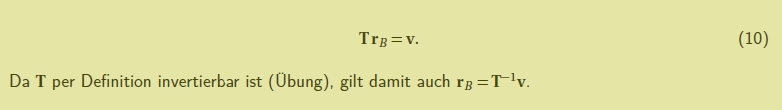

In [36]:
vector = np.array([[1.],[2.],[3.]])
vector

array([[1.],
       [2.],
       [3.]])

In [37]:
Basis = np.array([[1,0,0],[0,2,0],[0,0,3]])
Basis

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [38]:
Basis_inv = np.linalg.inv(Basis)
Basis_inv

array([[1.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.33333333]])

In [39]:
# Basistransformation durchfuehren
vector_B = Basis_inv @ vector
print(vector_B)

[[1.]
 [1.]
 [1.]]


### Basistransformationen von Matrizen

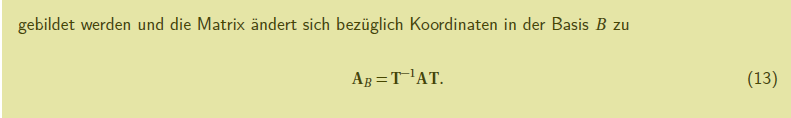

In [40]:
A = np.array([[1,0],[-1,2]])
A

array([[ 1,  0],
       [-1,  2]])

In [41]:
Basis = np.array([[2,0],[1,2]])
Basis

array([[2, 0],
       [1, 2]])

In [42]:
Basis_inv = np.linalg.inv(Basis)
Basis_inv

array([[ 0.5 ,  0.  ],
       [-0.25,  0.5 ]])

In [43]:
# Basistransformation einer Matrix durchfuheren
Ab = Basis_inv @ A @ Basis
Ab

array([[ 1. ,  0. ],
       [-0.5,  2. ]])

### Quadratische Form und Basistransformation einer Matrix mit deren Eigenbasis

In [44]:
# Vektoren und Matrix definieren fuer die Quadratische Form 
vector = np.array([[x],[y],[z]])
vector_T = vector.T
A = np.array([[3,2,4],[2,0,2],[4,2,3]])
display(vector_T, A, vector)

array([[x, y, z]], dtype=object)

array([[3, 2, 4],
       [2, 0, 2],
       [4, 2, 3]])

array([[x],
       [y],
       [z]], dtype=object)

In [45]:
# Die Quadratische Form ausrechnen
sym.simplify(vector_T @ A @ vector)

[[3*x**2 + 4*x*y + 8*x*z + 4*y*z + 3*z**2]]

In [46]:
# Wir wollen nun das Resultat vereinfachen, indem wir die Eigenbasis der Matrix mit sich selber transformieren. 
eigw, eigev = np.linalg.eig(A)
Basis = eigev
display(eigw)
display(Basis)
Basis_inv = np.linalg.inv(Basis)
display(Basis_inv)

array([-1.,  8., -1.])

array([[-0.74535599,  0.66666667, -0.21539222],
       [ 0.2981424 ,  0.33333333, -0.77010996],
       [ 0.59628479,  0.66666667,  0.6004472 ]])

array([[-0.74535599,  0.56813204,  0.46128997],
       [ 0.66666667,  0.33333333,  0.66666667],
       [-0.        , -0.93428818,  0.46714409]])

In [47]:
# Basistransofmration der Matrix A mit der Eigenbasis
Ab = np.round(Basis_inv @ A @ Basis)
Ab

array([[-1.,  0., -0.],
       [-0.,  8., -0.],
       [ 0.,  0., -1.]])

In [48]:
# Ausrechnen der Quadratische Form mit der Eigenbasis Transformation von A
sym.simplify(vector_T @ Ab @ vector)

[[-1.0*x**2 + 8.0*y**2 - 1.0*z**2]]

### Hauptkomponentenanalyse (PCA) -> Aufgabe

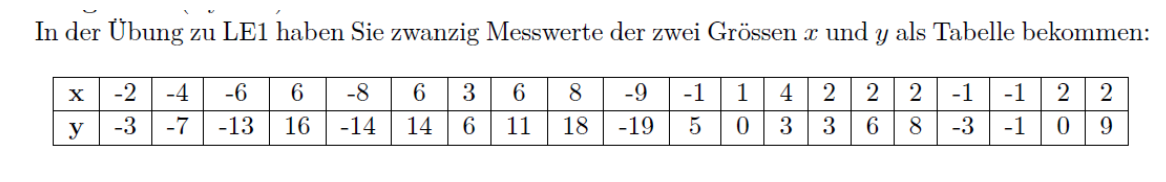

In [49]:
# Messpunkte
x = [-2, -4, -6, 6, -8, 6, 3, 6, 8, -9, -1, 1, 4, 2, 2, 2, -1, -1, 2, 2]
y = [-3, -7, -13, 16, -14, 14, 6, 11, 18, -19, 5, 0, 3, 3, 6, 8, -3, -1, 0, 9]

# Standardisierung 
x = (np.array(x) - np.mean(x)) / np.std(x)
y = (np.array(y) - np.mean(y)) / np.std(y)

# Matrix erstellen
X = np.array([x,y])
print(X.shape)
X

(2, 20)


array([[-0.57091174, -1.01007461, -1.44923749,  1.18573976, -1.88840036,
         1.18573976,  0.52699545,  1.18573976,  1.62490264, -2.1079818 ,
        -0.3513303 ,  0.08783258,  0.74657689,  0.30741401,  0.30741401,
         0.30741401, -0.3513303 , -0.3513303 ,  0.30741401,  0.30741401],
       [-0.51124062, -0.92436435, -1.54404995,  1.45109711, -1.64733088,
         1.24453524,  0.41828778,  0.93469244,  1.65765897, -2.16373555,
         0.31500685, -0.20139782,  0.10844498,  0.10844498,  0.41828778,
         0.62484964, -0.51124062, -0.30467875, -0.20139782,  0.72813058]])

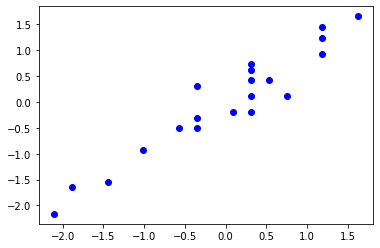

In [50]:
# visuelle Darstellung der Messpunkte
plt.scatter(X.T[ : , 0], X.T[ : , 1], color = "b")
plt.show()

In [51]:
# Um eine Quadratische Matriz zu erhalten, rechnen wir folgendes
XXT = X @ X.T 

In [52]:
# Eigenwerte und Eigenvektoren von XXT
eigenwerte, eigenvektoren = np.linalg.eig(XXT)
display(eigenwerte, eigenvektoren)

array([ 0.89103208, 39.10896792])

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [53]:
# Absteigende Sortierung der Eigenwerte und Eigenvektoren
eigenwerte = sorted(eigenwerte, reverse=True)
display(eigenwerte)

eigenvektoren = eigenvektoren[ : , [1,0]]
display(eigenvektoren)

v1 = eigenvektoren[ : , 0]
v2 = eigenvektoren[ : , 1]

[39.10896791545882, 0.8910320845411768]

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

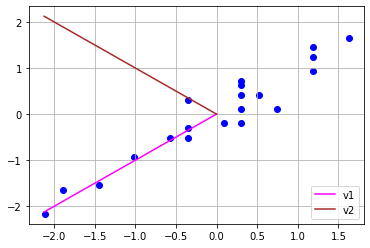

In [54]:
# Eigenvektoren visuell mit Messpunkte darstellen
plt.scatter(X.T[ : , 0], X.T[ : , 1], color = "blue")
plt.plot([0, v1[0] * 3], [0, v1[1] * 3], color = "magenta", label = "v1")
plt.plot([0, v2[0] * 3], [0, v2[1] * 3], color = "brown", label = "v2")
plt.grid()
plt.legend()
plt.show()

In [55]:
# Messwerte transformieren mit der eigenbasis von XXT
eigenbasis = eigenvektoren
eigenbasis_inv = np.linalg.inv(eigenbasis)

Xb = eigenbasis_inv @ X

x_b = Xb[ 0 , : ]
y_b = Xb[ 1 , : ]

In [56]:
Xb

array([[ 0.76519727,  1.36785491,  2.11657384, -1.86452523,  2.50013954,
        -1.71846394, -0.66841618, -1.49937199, -2.32112158,  3.0205603 ,
         0.02568456,  0.08030275, -0.60459176, -0.29405671, -0.51314866,
        -0.65920995,  0.60992975,  0.46386845, -0.07496477, -0.7322406 ],
       [ 0.04219385,  0.06060631, -0.06704253,  0.18763598,  0.17046187,
         0.04157468, -0.07686793, -0.17751726,  0.02316223, -0.03942385,
         0.47117151, -0.20451677, -0.4512274 , -0.14069235,  0.07839959,
         0.22446089, -0.11307367,  0.03298763, -0.3597843 ,  0.29749154]])

In [57]:
# Xb Eigenvektoren berechnen
eigenwXb, eigenvXb = np.linalg.eig(Xb @ Xb.T)
v1 = eigenvXb[ : , 0]
v2 = eigenvXb[ : , 1]


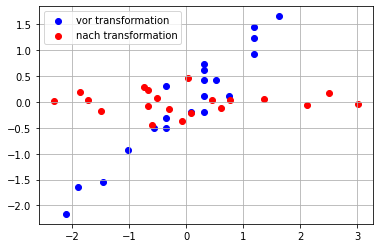

In [58]:
# Visuelle Darstellung nach der Eigenbasis Transformation der Messwerte x und y
plt.scatter(X[ 0 , : ], X[ 1 , :], color = "blue", label = "vor transformation")
plt.scatter(x_b, y_b, color = "red", label = "nach transformation")
plt.legend()
plt.grid()
plt.show()


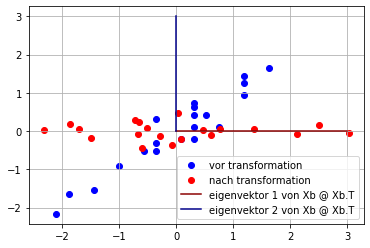

In [59]:
# Visuelle Darstellung mit den Eigenvektoren von Xb @ Xb.T 
plt.scatter(X[ 0 , : ], X[ 1 , :], color = "blue", label = "vor transformation")
plt.scatter(x_b, y_b, color = "red", label = "nach transformation")
plt.plot([0, v1[0] * 3], [0, v1[1] * 3], color = "darkred", label = "eigenvektor 1 von Xb @ Xb.T")
plt.plot([0, v2[0] * 3], [0, v2[1] * 3], color = "darkblue", label = "eigenvektor 2 von Xb @ Xb.T")
plt.legend()
plt.grid()
plt.show()


In [60]:
# Ruecktransformation der komprimierten Daten
x = X[ 0 , : ]
x

array([-0.57091174, -1.01007461, -1.44923749,  1.18573976, -1.88840036,
        1.18573976,  0.52699545,  1.18573976,  1.62490264, -2.1079818 ,
       -0.3513303 ,  0.08783258,  0.74657689,  0.30741401,  0.30741401,
        0.30741401, -0.3513303 , -0.3513303 ,  0.30741401,  0.30741401])

In [61]:
# y eliminieren mit und mit 0 auffuellen
Z_x = np.vstack( [x, np.zeros_like(x)] ) 
Z_x

array([[-0.57091174, -1.01007461, -1.44923749,  1.18573976, -1.88840036,
         1.18573976,  0.52699545,  1.18573976,  1.62490264, -2.1079818 ,
        -0.3513303 ,  0.08783258,  0.74657689,  0.30741401,  0.30741401,
         0.30741401, -0.3513303 , -0.3513303 ,  0.30741401,  0.30741401],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

array([[ 0.40369556,  0.71423061,  1.02476566, -0.83844463,  1.3353007 ,
        -0.83844463, -0.37264206, -0.83844463, -1.14897967,  1.49056823,
         0.24842804, -0.06210701, -0.52790958, -0.21737453, -0.21737453,
        -0.21737453,  0.24842804,  0.24842804, -0.21737453, -0.21737453],
       [ 0.40369556,  0.71423061,  1.02476566, -0.83844463,  1.3353007 ,
        -0.83844463, -0.37264206, -0.83844463, -1.14897967,  1.49056823,
         0.24842804, -0.06210701, -0.52790958, -0.21737453, -0.21737453,
        -0.21737453,  0.24842804,  0.24842804, -0.21737453, -0.21737453]])

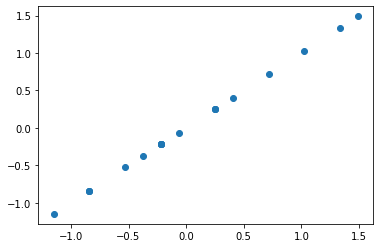

In [62]:
# Transofmration mit der eigenbasis von XXT 
Z = eigenbasis_inv @ Z_x
display(Z)
# Visuelle Darstellung
plt.scatter(Z[0,:], Z[1,:])
plt.show()

## LE 4 Normen und Ähnlichkeitsmasse

### Vektornormen

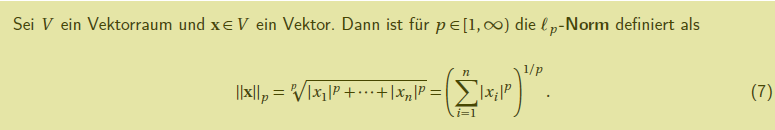

In [63]:
v = np.array([0,2,-1]).reshape(3,1)
v

array([[ 0],
       [ 2],
       [-1]])

In [64]:
M = np.array([[0,0,-2],[1,2,1],[1,0,3]])
M

array([[ 0,  0, -2],
       [ 1,  2,  1],
       [ 1,  0,  3]])

In [65]:
M_T_M = M.T @ M
M_T_M

array([[ 2,  2,  4],
       [ 2,  4,  2],
       [ 4,  2, 14]])

In [66]:
v = np.array([1,-2,3]).reshape(3,1)
v

array([[ 1],
       [-2],
       [ 3]])

In [67]:
# Summe aller Komponenten (Positive Definitheit)
gesamtnorm_v = np.linalg.norm(v, ord = 1)
gesamtnorm_v

6.0

In [68]:
# Absolute Homogeneitaet
a = -3
a * gesamtnorm_v == np.linalg.norm(v * a, ord = 1) 

False

#### L1 - Norm (Manhatten Norm)

In [69]:
# Alle Elemente als Betrag aufsummiert ist die L1 - Norm
np.linalg.norm(v, ord = 1)

6.0

#### L2 - Norm (Euklidische Norm)

In [70]:
# Alle Elemente als Betraf quadriert, aufsummiert und die 2 Wurzel ziehen
np.linalg.norm(v, ord = 2)

3.7416573867739413

#### L5 - Norm

In [71]:
# Alle Elemente als Betrag hoch 5, aufsummieren und die 5 Wurzel ziehen
def get_norm(v: np.array, lp: int) -> float:
    return float(sum([abs(x) ** lp for x in v]) ** (1/lp))

In [72]:
get_norm(v, 5)

3.077384885394063

#### L∞ - Norm (Maximumsnorm)

In [73]:
np.linalg.norm(v, ord = np.inf)

3.0

### Vektornormen definierte Matrizennormen

#### Summennorm / Manhatten Norm p = 1

In [74]:
# Summe aller Elemente als Betrag einer Matrix
def get_summennorm(M: np.array) -> float:
    return sum(sum(abs(M)))

In [75]:
get_summennorm(M)

10

#### Frobeniusnorm p = 2

In [76]:
# Wurzel aus der Summe der Diagonalelemente von M.T @ M
np.linalg.norm(M, ord = "fro")

4.47213595499958

In [77]:
sum(np.diag(M_T_M))**0.5

4.47213595499958

#### Gesamtnorm p = ∞

In [78]:
# Wurzel aus dem Produkt der Dimension der Matrix multipliziert mit dem groessten Wert der Matrix
def get_gesamtnorm(M: np.array) -> float:
    return (M.shape[0] * M.shape[1]) ** 0.5 * np.max(np.abs(M))

In [79]:
get_gesamtnorm(M)

9.0

### Operatornormen definierte Matrizennormen

#### Spaltennorm p = 1

In [80]:
# Maximaler Wert einer Spaltensumme der Matrix
np.linalg.norm(M, ord = 1)

6.0

#### Spektralnorm p = 2

In [81]:
# Spektralnorm von M: Wurzel aus dem groessten Eigenwert von M.T @ M
np.linalg.norm(M_T_M, ord = 2)

15.745966692414838

In [82]:
# Alternative
np.linalg.norm(M, ord = 2) ** 2

15.745966692414834

#### Zeilennorm p = ∞

In [83]:
# Maximaler Wert einer Zeilensumme der Matrix
np.linalg.norm(M, ord = np.inf)

4.0

### Distanz
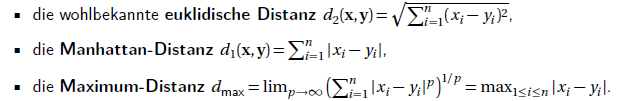

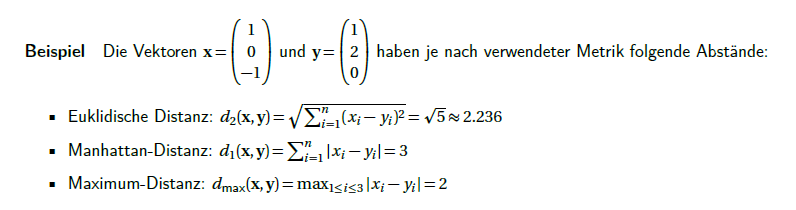

In [84]:
v1 = np.array([1,0,-1]).reshape(3,1)
v2 = np.array([1,2,0]).reshape(3,1)

#### Euklidische Distanz

In [85]:
np.linalg.norm(v1 - v2, ord = 2)

2.23606797749979

#### Manhatten Distanz

In [86]:
np.linalg.norm(v1 - v2, ord = 1)

3.0

#### Maximum Distanz

In [87]:
np.linalg.norm(v1 - v2, ord = np.inf)

2.0

### Aehnlichkeitsmass

In [88]:
v1 = np.array([1,0,-1]).reshape(3,1)
v2 = np.array([1,2,0]).reshape(3,1)

#### Cosinus-Aehnlichkeit (Cosin-similarity)

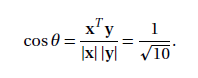

In [89]:
(v1.T @ v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

array([[0.31622777]])

#### Korrelations-Aehnlichkeit

In [90]:
x = (0.9, -1.0, 0.7, -1.9, 0.9, -1.7, 0.3, -1.6, -2.7, 0.6)
y = (-0.5, -0.1, -0.6, -0.1, -2.5, -2.2, 1.1, 0.6, 0.6, 0.2)

In [91]:
# Erhalte eine Korrelationsmatrix! 
np.corrcoef(x, y)

array([[ 1.        , -0.21678238],
       [-0.21678238,  1.        ]])

Interpretation einer Korrelationsmatrix
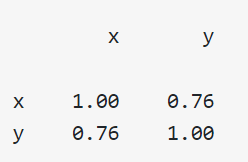

#### Jacard-Aehnlichkeit (Binaer)

In [92]:
x = [1, 1, 0, 0, 1, 0, 1]
y = [0, 1, 1, 0, 1, 0, 1]

In [93]:
def jaccard_binary(x,y):
    schnittmenge = np.logical_and(x, y)
    vereinigung = np.logical_or(x, y)
    return schnittmenge.sum() / vereinigung.sum()

In [94]:
schnittmenge = np.logical_and(x,y)
schnittmenge

array([False,  True, False, False,  True, False,  True])

In [95]:
vereinigung = np.logical_or(x, y)
vereinigung

array([ True,  True,  True, False,  True, False,  True])

In [96]:
jaccard_binary(x, y)

0.6

## LE 5 Transfer auf Machine Learning – Algorithmen

Das essenzielle von LE5

### Lineare Regression

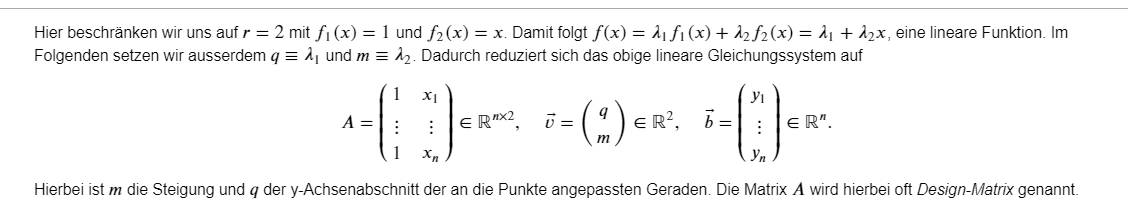

### Lineare Regression 2D

In [97]:
w = np.array( 
    [(0.0, 3.8), (1.0, 3.9), (2.0, 5.4), (3.0, 6.5), (4.0, 6.1), (5.0, 10.5), (6.0, 10.3), (7.0, 12.6), 
     (8.0, 12.1), (9.0, 14.4), (10.0, 14.7)] )
display(w)

x = w[ : , 0]
y = w[ : , 1]

array([[ 0. ,  3.8],
       [ 1. ,  3.9],
       [ 2. ,  5.4],
       [ 3. ,  6.5],
       [ 4. ,  6.1],
       [ 5. , 10.5],
       [ 6. , 10.3],
       [ 7. , 12.6],
       [ 8. , 12.1],
       [ 9. , 14.4],
       [10. , 14.7]])

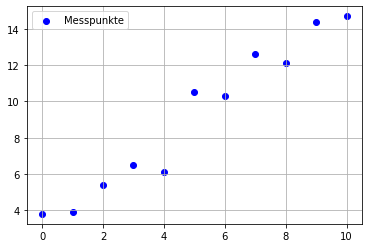

In [98]:
# Visuelle Darstellung der Punkte
plt.scatter(x, y, color = "b", label = "Messpunkte")
plt.grid()
plt.legend()
plt.show()

In [99]:
# Matrix A erstellen
ones = np.ones(len(x)).reshape(-1,1)
x_A = x.reshape(-1,1)

A = np.hstack([ones, x_A,])
display(A)

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [100]:
# Matrix (Vektor) b erstellen
b = y.reshape(-1,1)

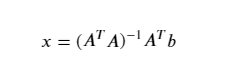

In [101]:
# Normalengleichung durchfuheren
x_v = np.linalg.inv(A.T @ A) @ (A.T @ b)
x_v

array([[3.07272727],
       [1.20909091]])

In [102]:
# Interpretation vom x_v Vektor
achsenabschnitt = x_v[0]
steigung_x = x_v[1]

display(achsenabschnitt, steigung_x)

array([3.07272727])

array([1.20909091])

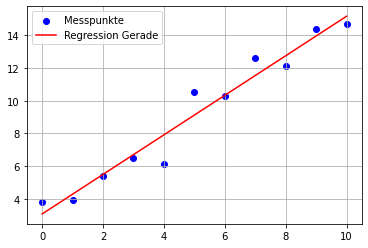

In [103]:
# Visuelle Darstellung der Punkte mit der Gerade
values = np.linspace(min(x), max(x), 2)
plt.scatter(x, y, color = "b", label = "Messpunkte")
plt.plot(values, achsenabschnitt + steigung_x * values, c = "r", label = "Regression Gerade")
plt.plot()
plt.grid()
plt.legend()
plt.show()


### Multiple Lineare Regression

In [104]:
w = np.array( 
    [(0.0, 3.8, 3.8), (1.0, 3.9, 3.9), (2.0, 5.4, 10.8), (3.0, 6.5, 19.5), (4.0, 6.1, 24.5), (5.0, 10.5, 50.8), 
     (6.0, 10.3, 61), (7.0, 12.6, 84), (8.0, 12.1, 96), (9.0, 14.4, 130), (10.0, 14.7, 147)] )
display(w)

x = w[ : , 0]
y = w[ : , 1]
z = w[ : , 2]

array([[  0. ,   3.8,   3.8],
       [  1. ,   3.9,   3.9],
       [  2. ,   5.4,  10.8],
       [  3. ,   6.5,  19.5],
       [  4. ,   6.1,  24.5],
       [  5. ,  10.5,  50.8],
       [  6. ,  10.3,  61. ],
       [  7. ,  12.6,  84. ],
       [  8. ,  12.1,  96. ],
       [  9. ,  14.4, 130. ],
       [ 10. ,  14.7, 147. ]])

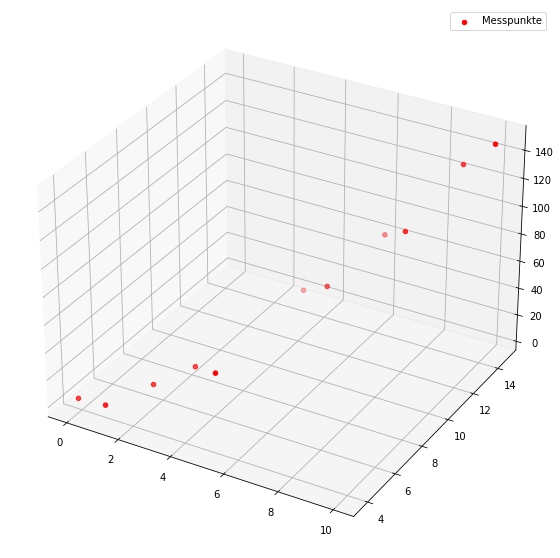

In [105]:
# Visuelle Darstellung der Punkte
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c = "r", label = "Messpunkte")
plt.legend()
plt.grid()
plt.show()

In [106]:
# Matrix A und b definieren
ones = np.ones(len(x)).reshape(-1,1)
x_A = x.reshape(-1,1)
y_A = y.reshape(-1,1)
A = np.hstack([ones, x_A, y_A])

b = z.reshape(-1,1)

In [107]:
# Normalengleichung durchfuheren (Nach Vektor x aufloesen)
x_v = np.linalg.inv(A.T @ A) @ (A.T @ b)
x_v

array([[-31.96251549],
       [  9.12275143],
       [  4.7969725 ]])

In [108]:
# Interpreation von Vektor x_v
achsenabschnitt = x_v[0]
steigung_x = x_v[1]
steigung_y = x_v[2]

display(achsenabschnitt, steigung_x, steigung_y)

array([-31.96251549])

array([9.12275143])

array([4.7969725])

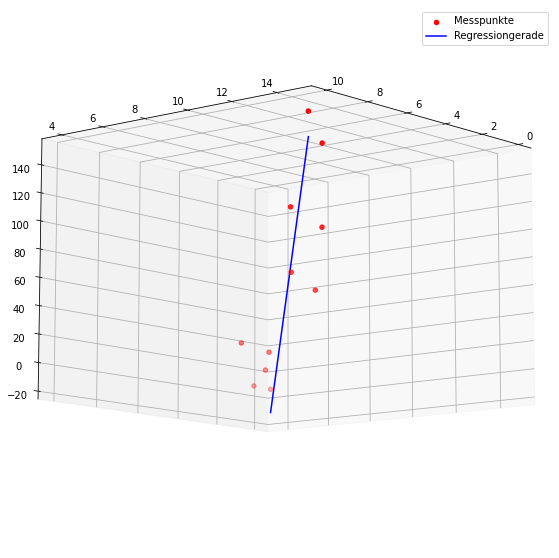

In [109]:
# Visuelle Darstellung von Punkten und Gerade
values_x = np.linspace(min(x), max(x), 2)
values_y = np.linspace(min(y), max(y), 2)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c = "r", label = "Messpunkte")
ax.plot(values_x, values_y, achsenabschnitt + steigung_x * values_x + steigung_y * values_y, c = "b", label = "Regressiongerade")
ax.view_init(azim=0, elev=90) # Vogelperspektive
ax.view_init(-10,40)
plt.legend()
plt.grid()
plt.show()


### Singulaerwertzerlegung

In [110]:
M = np.array([[10,20,30],[69,420,360],[5,42,70]])
M

array([[ 10,  20,  30],
       [ 69, 420, 360],
       [  5,  42,  70]])

#### Singuaerwertzerlegung durchfuehren

In [111]:
U, S, VH = np.linalg.svd(M)
S = np.diag(S)
display(U, S, VH)

array([[-0.06338763, -0.32673631,  0.94298748],
       [-0.98844328,  0.15092952, -0.01414751],
       [-0.13770215, -0.93298642, -0.33252738]])

array([[563.96162596,   0.        ,   0.        ],
       [  0.        ,  27.38723139,   0.        ],
       [  0.        ,   0.        ,   6.87197227]])

array([[-0.12327962, -0.74862793, -0.65142794],
       [ 0.0906204 ,  0.6452001 , -0.75862031],
       [ 0.98822572, -0.15255508, -0.01169906]])

#### Zusammenhang Eigenwerte und Singulaerwerte einer Matrix

In [112]:
np.linalg.eigvals(M.T@ M) ** 0.5

array([563.96162596,   6.87197227,  27.38723139])

#### Matrix M rekonstruieren mit Rang 2 

In [113]:
k = 1
M_recon = U[ : , :k] @ S[ :k , :k ] @ VH[:k , :]
M_recon

array([[  4.40702357,  26.76209556,  23.2873718 ],
       [ 68.72149335, 417.31820678, 363.13465136],
       [  9.57373818,  58.13749169,  50.58906473]])

#### Distanzen zwischen 2 Matrizen berechnen

In [114]:
np.linalg.norm(M - M_recon, ord = "fro")

28.236225776055058

In [115]:
np.linalg.norm(M_recon - M, ord = "fro")

28.236225776055058

In [116]:
np.linalg.norm(M_recon - M, ord = 2)

27.387231390293543

### Recommander System 

### Page Rank